___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 131)
pd.set_option('display.max_rows', 131)

ImportError: cannot import name 'artist' from 'matplotlib' (c:\Users\Birgül\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\__init__.py)

In [378]:
df = pd.read_csv("final_scout_dummy.csv")
df

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,99.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,129.000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,99.000,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,99.000,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,109.000,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,

In [379]:
df.shape

(15909, 132)

In [290]:
df.isnull().sum()

price                                       0
km                                          0
Gears                                       0
age                                         0
Previous_Owners                             0
hp_kW                                       0
Inspection_new                              0
Displacement_cc                             0
Weight_kg                                   0
cons_comb                                   0
CO2_Emission                                0
cc_Air conditioning                         0
cc_Air suspension                           0
cc_Armrest                                  0
cc_Automatic climate control                0
cc_Auxiliary heating                        0
cc_Cruise control                           0
cc_Electric Starter                         0
cc_Electric tailgate                        0
cc_Electrical side mirrors                  0
cc_Electrically adjustable seats            0
cc_Electrically heated windshield 

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Columns: 132 entries, price to Drive_chain_rear
dtypes: float64(9), int64(123)
memory usage: 16.0 MB


In [381]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
count,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000,15909.000
mean,18020.242,32092.437,5.937,1.390,1.043,88.498,0.247,1428.657,1337.675,4.832,117.783,0.948,0

In [293]:
df.isnull().any().any()

False

In [382]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.474
Gearing_Type_Manual                        -0.432
km                                         -0.399
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.367
make_model_Renault Clio                    -0.298
Drive_chain_front                          -0.156
Previous_Owners                            -0.145
make_model_Opel Astra                      -0.128
em_CD player                               -0.093
em_On-board computer                       -0.077
ss_Central door lock with remote control   -0.070
ss_Fog lights                              -0.053
Paint_Type_Perl effect                     -0.050
ss_Isofix                                  -0.046
body_type_Sedans                           -0.045
ss_Central door lock                       -0.044
ss_Power steering                          -0.042
ss_Head airbag                             -0.035
Paint_Type_Uni/basic                       -0.035


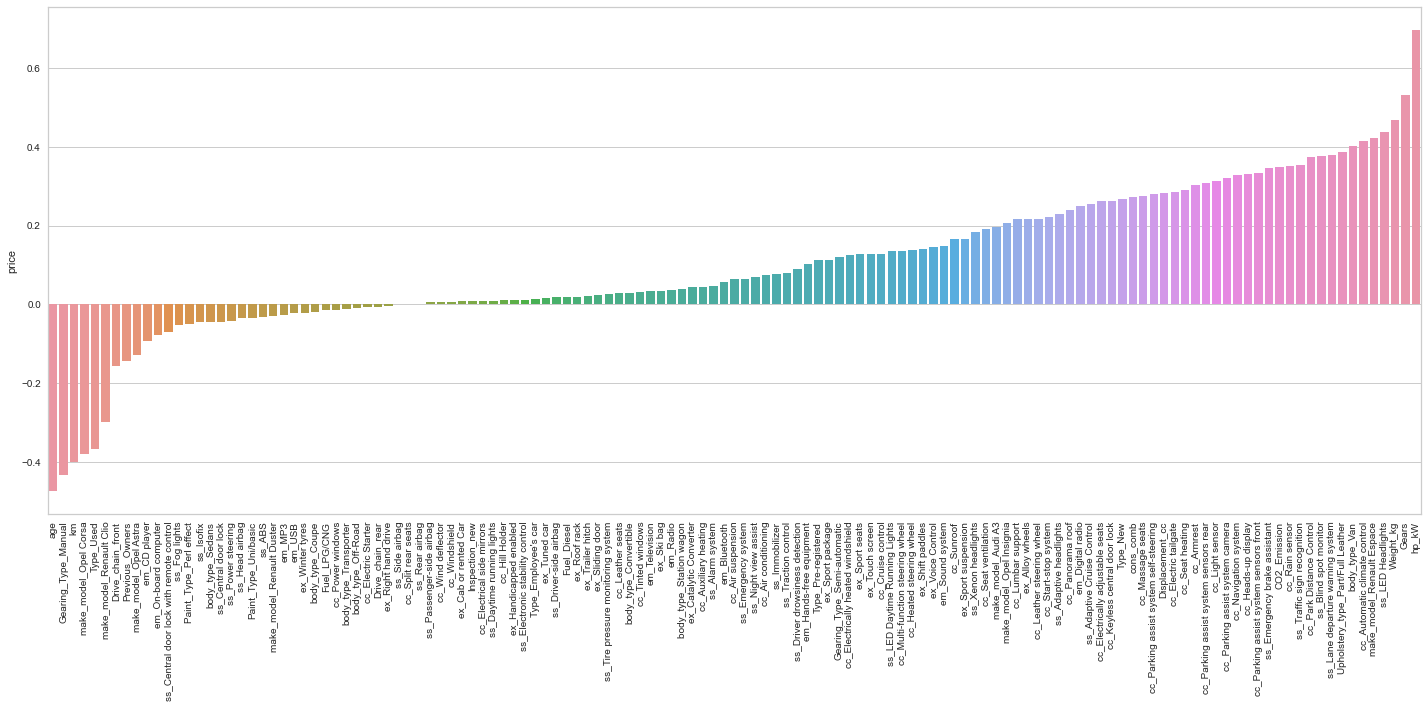

In [383]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [384]:
X = df.drop("price", axis =1)
y = df["price"]

In [385]:
from sklearn.model_selection import train_test_split

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [387]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (12727, 131)
Train target shape   :  (12727,)
Test features shape  :  (3182, 131)
Test target shape    :  (3182,)


In [388]:
X_train

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
14291,9.000,5.000,0.000,1.000,56.000,0,898.000,1200.000,5.200,118.000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
10944,72000.000,6.000,3.000,1.000,100.000,1,1598.000,1487.000,3.900,103.000,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
2582,500.000,5.000,0.000,1.000,85.000,0,999.000,1136.000,4.800,108.000,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
14038,10.000,6.000,0.000,0.000,56.000,0,1197.000,1087.000,5.000,85.000,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
12550,10.000,8.000,0.000,0.000,125.000,0,1956.000,1633.000,5.300,139.000,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,

In [389]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [390]:
scaler.fit(X_train) 

StandardScaler()

In [391]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.86949675, -1.32654735, -1.2437874 , ..., -0.17447888,
         0.111398  , -0.01535496],
       [ 1.06277763,  0.08897777,  1.43180259, ..., -0.17447888,
         0.111398  , -0.01535496],
       [-0.85631807, -1.32654735, -1.2437874 , ..., -0.17447888,
         0.111398  , -0.01535496],
       ...,
       [-0.48310092,  1.50450289, -0.35192407, ..., -0.17447888,
         0.111398  , -0.01535496],
       [-0.84289782,  0.08897777, -1.2437874 , ..., -0.17447888,
         0.111398  , -0.01535496],
       [-0.86971148, -1.32654735, -1.2437874 , ..., -0.17447888,
         0.111398  , -0.01535496]])

In [392]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.86971148, -1.32654735, -1.2437874 , ..., -0.17447888,
         0.111398  , -0.01535496],
       [ 0.47784263, -1.32654735,  1.43180259, ..., -0.17447888,
         0.111398  , -0.01535496],
       [ 0.19829883,  0.08897777,  0.53993926, ..., -0.17447888,
         0.111398  , -0.01535496],
       ...,
       [-0.63085787,  0.08897777, -0.35192407, ..., -0.17447888,
         0.111398  , -0.01535496],
       [-0.08658623,  0.08897777, -0.35192407, ..., -0.17447888,
         0.111398  , -0.01535496],
       [-0.86898678,  1.50450289, -0.35192407, ..., -0.17447888,
         0.111398  , -0.01535496]])

In [393]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
mean,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [394]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
mean,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [395]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -8.976822006330154 - 112.809574061779
X_test_range   : -8.976822006330154 - 112.809574061779


In [396]:
X_test.shape

(3182, 131)

In [397]:
y_test.shape

(3182,)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [398]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [399]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [400]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [401]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [402]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.891,0.888
mae,1692.890,1708.145
mse,5877196.535,6208010.584
rmse,2424.293,2491.588


Cross_validation

In [404]:
from sklearn.model_selection import cross_validate, cross_val_score

In [405]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10,return_train_score=True)

In [406]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.110,0.002,0.873,0.893,-1794.060,-1674.064,-7421303.297,-5719951.543,-2724.207,-2391.642
1,0.152,0.002,0.892,0.891,-1703.663,-1692.159,-6080271.113,-5864808.173,-2465.821,-2421.737
2,0.087,0.002,0.892,0.891,-1684.170,-1696.649,-5938753.023,-5882751.496,-2436.956,-2425.438
3,0.094,0.001,0.464,0.890,-1794.127,-1701.902,-27951645.417,-5960129.074,-5286.932,-2441.338
4,0.095,0.002,0.874,0.893,-1727.573,-1692.676,-5975261.108,-5875670.751,-2444.435,-2423.978
5,0.109,0.002,0.891,0.891,-1663.985,-1702.740,-5482030.197,-5930707.756,-2341.374,-2435.304
6,0.094,0.002,0.891,0.891,-1713.002,-1697.394,-5491194.997,-5928176.332,-2343.330,-2434.785
7,0.097,0.002,0.890,0.891,-1781.597,-1683.215,-6487091.542,-5822323.275,-2546.977,-2412.949
8,0.094,0.001,0.894,0.891,-1700.966,-1691.773,-6332728.880,-5840613.643,-2516.491,-2416.736
9,0.091,0.001,0.825,0.892,-1743.722,-1690.565,-9157660.705,-5855071.286,-3026.163,-2419.725


In [407]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.839
train_r2                                   0.892
test_neg_mean_absolute_error           -1730.686
train_neg_mean_absolute_error          -1692.314
test_neg_mean_squared_error         -8631794.028
train_neg_mean_squared_error        -5868020.333
test_neg_root_mean_squared_error       -2813.268
train_neg_root_mean_squared_error      -2422.363
dtype: float64

In [408]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.891,0.888
mae,1692.890,1708.145
mse,5877196.535,6208010.584
rmse,2424.293,2491.588


In [409]:
lm.coef_

array([-1.38178793e+03,  4.35006362e+02, -1.81695307e+03,  5.94115973e+01,
        2.46916935e+03, -7.75796253e+01, -1.08077236e+02, -2.10708142e+02,
        5.22045084e+02, -5.69511606e+02,  7.06659931e+01, -6.98060541e+00,
        1.54495488e+01,  1.23245133e+02, -1.90333683e+01,  1.49703388e+02,
       -1.31722457e+01, -2.60309345e+01,  4.14437253e+01,  4.87168793e+01,
        9.35949511e+01,  4.50452111e+02,  1.54715534e+02,  4.70751786e+01,
        2.60536576e+01, -3.30405097e+01,  9.29879150e+01,  3.50002044e+01,
       -1.36987171e+02,  9.41073518e+01,  6.18201570e+01,  1.41905068e+02,
       -3.22314070e+01,  2.99387662e+02,  5.58041117e+01,  1.92794602e+02,
        1.19005999e+02, -2.63166386e+02,  1.32780853e+01, -1.20729553e+02,
       -2.17881882e+01,  1.64565157e+02, -9.38590213e+01, -2.43052568e+01,
        1.14803757e+02,  2.31572763e+01, -2.86934027e+01, -2.09237311e+01,
       -1.67820085e+02,  4.73321191e+01,  2.49537058e+02,  4.50162462e-03,
        2.00822451e+01, -

In [410]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-1381.788
1,435.006
2,-1816.953
3,59.412
4,2469.169
5,-77.580
6,-108.077
7,-210.708
8,522.045
9,-569.512


In [322]:
residuals = y_test-y_pred

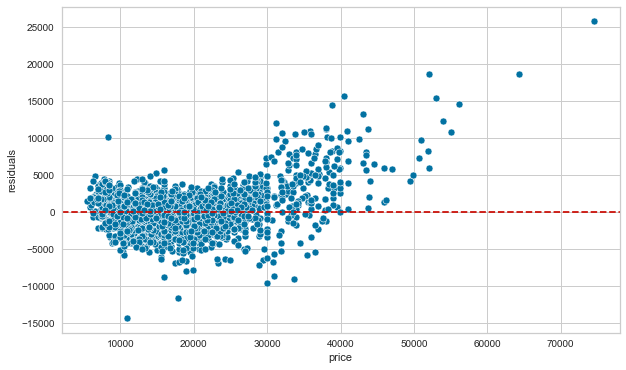

In [323]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

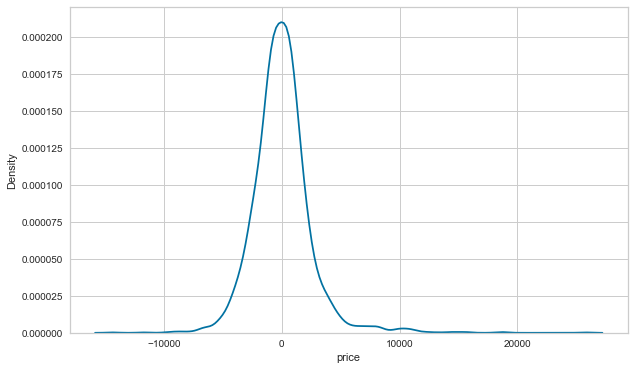

In [324]:
sns.kdeplot(residuals);

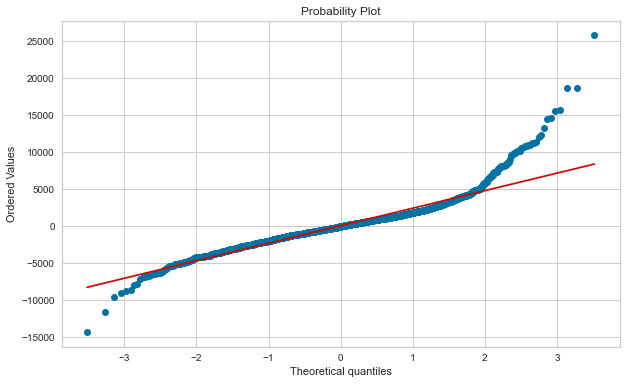

In [325]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [326]:
from scipy.stats import skew
skew(residuals)

1.4340690673820276

In [411]:
y_pred = lm.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_mse = mean_squared_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [412]:
print(lm_R2)

0.888120186103692


In [413]:
print(lm_mae)

1708.1446943854594


In [414]:
print(lm_rmse)

2491.5879642869327


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [415]:
from sklearn.linear_model import Ridge

In [416]:
ridge_model = Ridge(alpha=1)

In [417]:
ridge_model.fit(X_train_scaled, y_train) 

Ridge(alpha=1)

In [418]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [420]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")  
                    
rs

,ridge_train,ridge_test
R2,0.891,0.888
mae,1692.859,1708.078
mse,5877197.372,6207873.108
rmse,2424.293,2491.560


In [421]:
pd.concat([ls, rs], axis=1)  

,linear_train,linear_test,ridge_train,ridge_test
R2,0.891,0.888,0.891,0.888
mae,1692.890,1708.145,1692.859,1708.078
mse,5877196.535,6208010.584,5877197.372,6207873.108
rmse,2424.293,2491.588,2424.293,2491.560


Ridge icin cross validation

In [422]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10, return_train_score=True)

In [423]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.032,0.002,0.873,0.893,-1794.072,-1674.025,-7421419.084,-5719952.562,-2724.228,-2391.642
1,0.033,0.002,0.892,0.891,-1703.647,-1692.126,-6080369.501,-5864809.209,-2465.841,-2421.737
2,0.033,0.001,0.892,0.891,-1684.109,-1696.615,-5938749.588,-5882752.514,-2436.955,-2425.439
3,0.036,0.002,0.901,0.890,-1660.619,-1701.868,-5185698.297,-5960130.135,-2277.213,-2441.338
4,0.026,0.002,0.874,0.893,-1727.533,-1692.639,-5975087.667,-5875671.803,-2444.399,-2423.979
5,0.035,0.004,0.891,0.891,-1663.930,-1702.702,-5481663.070,-5930708.811,-2341.295,-2435.305
6,0.030,0.001,0.891,0.891,-1712.976,-1697.362,-5491098.495,-5928177.381,-2343.309,-2434.785
7,0.033,0.001,0.890,0.891,-1781.564,-1683.178,-6487075.635,-5822324.314,-2546.974,-2412.949
8,0.032,0.002,0.894,0.891,-1700.901,-1691.741,-6332877.396,-5840614.662,-2516.521,-2416.736
9,0.028,0.002,0.882,0.892,-1696.341,-1690.538,-6164982.851,-5855072.288,-2482.938,-2419.726


In [424]:
scores = pd.DataFrame(scores)
scores.iloc[:,2:].mean()

test_r2                                    0.888
train_r2                                   0.892
test_neg_mean_absolute_error           -1712.569
train_neg_mean_absolute_error          -1692.279
test_neg_mean_squared_error         -6055902.158
train_neg_mean_squared_error        -5868021.368
test_neg_root_mean_squared_error       -2457.967
train_neg_root_mean_squared_error      -2422.363
dtype: float64

In [425]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.891,0.888
mae,1692.859,1708.078
mse,5877197.372,6207873.108
rmse,2424.293,2491.560


In [426]:
ridge_model.coef_

array([-1.38170067e+03,  4.35276939e+02, -1.81684315e+03,  5.93181675e+01,
        2.46813602e+03, -7.76301785e+01, -1.07538825e+02, -2.10479035e+02,
        5.21443592e+02, -5.69034879e+02,  7.06685158e+01, -6.97652449e+00,
        1.56078057e+01,  1.23394679e+02, -1.90463430e+01,  1.49503817e+02,
       -1.31696139e+01, -2.59748113e+01,  4.13471960e+01,  4.86974880e+01,
        9.35953314e+01,  4.50476881e+02,  1.54449934e+02,  4.69563391e+01,
        2.60201911e+01, -3.30440303e+01,  9.30344124e+01,  3.50144288e+01,
       -1.36940206e+02,  9.41322797e+01,  6.18360928e+01,  1.41867311e+02,
       -3.22173487e+01,  2.99392723e+02,  5.57470308e+01,  1.92779013e+02,
        1.18942039e+02, -2.63017967e+02,  1.32623913e+01, -1.20643466e+02,
       -2.15426512e+01,  1.64594633e+02, -9.37909366e+01, -2.41427907e+01,
        1.14814448e+02,  2.31112132e+01, -2.86812595e+01, -2.09343313e+01,
       -1.67817853e+02,  4.73674763e+01,  2.49505928e+02, -3.35807738e-02,
        2.01017278e+01, -

In [342]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [427]:
pd.concat([lm_df,rm_df], axis = 1) 

,lm_coef,ridge_coef_1
0,-1381.788,-1381.701
1,435.006,435.277
2,-1816.953,-1816.843
3,59.412,59.318
4,2469.169,2468.136
5,-77.580,-77.630
6,-108.077,-107.539
7,-210.708,-210.479
8,522.045,521.444
9,-569.512,-569.035


In [428]:
from sklearn.model_selection import GridSearchCV

In [429]:
alpha_space = np.linspace(0.01, 1, 100)  
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [430]:
ridge_model = Ridge()

In [432]:
param_grid = {"alpha":alpha_space}

In [433]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2,return_train_score=True)

In [434]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [435]:
grid_ridge.best_params_

{'alpha': 1.0}

In [436]:
pd.DataFrame(grid_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.030,0.007,0.001,0.000,0.010,{'alpha': 0.01},-2724.207,-2465.821,-2436.956,-2277.281,-2444.434,-2341.373,-2343.330,-2546.977,-2516.492,-2482.860,-2457.973,119.550,100,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
1,0.026,0.001,0.001,0.000,0.020,{'alpha': 0.02},-2724.207,-2465.821,-2436.956,-2277.281,-2444.434,-2341.372,-2343.329,-2546.977,-2516.492,-2482.861,-2457.973,119.550,99,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
2,0.029,0.005,0.001,0.000,0.030,{'alpha': 0.03},-2724.208,-2465.821,-2436.956,-2277.280,-2444.434,-2341.371,-2343.329,-2546.977,-2516.492,-2482.861,-2457.973,119.550,98,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
3,0.033,0.005,0.002,0.001,0.040,{'alpha': 0.04},-2724.208,-2465.821,-2436.956,-2277.279,-2444.433,-2341.370,-2343.329,-2546.977,-2516.493,-2482.862,-2457.973,119.550,97,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
4,0.037,0.016,0.001,0.001,0.050,{'alpha': 0.05},-2724.208,-2465.822,-2436.956,-2277.279,-2444.433,-2341.370,-2343.329,-2546.977,-2516.493,-2482.863,-2457.973,119.551,96,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
5,0.030,0.005,0.001,0.000,0.060,{'alpha': 0.060000000000000005},-2724.208,-2465.822,-2436.956,-2277.278,-2444.433,-2341.369,-2343.329,-2546.977,-2516.493,-2482.864,-2457.973,119.551,95,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
6,0.029,0.006,0.001,0.000,0.070,{'alpha': 0.06999999999999999},-2724.208,-2465.822,-2436.956,-2277.277,-2444.432,-2341.368,-2343.328,-2546.977,-2516.493,-2482.865,-2457.973,119.551,94,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
7,0.033,0.004,0.001,0.000,0.080,{'alpha': 0.08},-2724.209,-2465.822,-2436.956,-2277.277,-2444.432,-2341.367,-2343.328,-2546.977,-2516.494,-2482.865,-2457.973,119.551,93,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
8,0.029,0.004,0.001,0.000,0.090,{'alpha': 0.09},-2724.209,-2465.822,-2436.956,-2277.276,-2444.432,-2341.366,-2343.328,-2546.977,-2516.494,-2482.866,-2457.973,119.552,92,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286
9,0.029,0.004,0.001,0.000,0.100,{'alpha': 0.09999999999999999},-2724.209,-2465.823,-2436.956,-2277.275,-2444.431,-2341.366,-2343.328,-2546.977,-2516.494,-2482.867,-2457.972,119.552,91,-2391.642,-2421.737,-2425.438,-2441.338,-2423.978,-2435.304,-2434.785,-2412.949,-2416.736,-2419.725,-2422.363,13.286


In [437]:
grid_ridge.best_index_ 

99

In [438]:
pd.DataFrame(grid_ridge.cv_results_).loc[1,["mean_test_score", "mean_train_score"]]

mean_test_score    -2457.973
mean_train_score   -2422.363
Name: 1, dtype: object

In [439]:
grid_ridge.best_score_

-2457.967328589558

In [440]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [441]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.891,0.888
mae,1692.859,1708.078
mse,5877197.372,6207873.108
rmse,2424.293,2491.560


In [442]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.891,0.888,0.891,0.888,0.891,0.888
mae,1692.890,1708.145,1692.859,1708.078,1692.859,1708.078
mse,5877196.535,6208010.584,5877197.372,6207873.108,5877197.372,6207873.108
rmse,2424.293,2491.588,2424.293,2491.560,2424.293,2491.560


In [443]:
rm = Ridge(alpha=1).fit(X_train_scaled, y_train) 
                                                     
rm.coef_

array([-1.38170067e+03,  4.35276939e+02, -1.81684315e+03,  5.93181675e+01,
        2.46813602e+03, -7.76301785e+01, -1.07538825e+02, -2.10479035e+02,
        5.21443592e+02, -5.69034879e+02,  7.06685158e+01, -6.97652449e+00,
        1.56078057e+01,  1.23394679e+02, -1.90463430e+01,  1.49503817e+02,
       -1.31696139e+01, -2.59748113e+01,  4.13471960e+01,  4.86974880e+01,
        9.35953314e+01,  4.50476881e+02,  1.54449934e+02,  4.69563391e+01,
        2.60201911e+01, -3.30440303e+01,  9.30344124e+01,  3.50144288e+01,
       -1.36940206e+02,  9.41322797e+01,  6.18360928e+01,  1.41867311e+02,
       -3.22173487e+01,  2.99392723e+02,  5.57470308e+01,  1.92779013e+02,
        1.18942039e+02, -2.63017967e+02,  1.32623913e+01, -1.20643466e+02,
       -2.15426512e+01,  1.64594633e+02, -9.37909366e+01, -2.41427907e+01,
        1.14814448e+02,  2.31112132e+01, -2.86812595e+01, -2.09343313e+01,
       -1.67817853e+02,  4.73674763e+01,  2.49505928e+02, -3.35807738e-02,
        2.01017278e+01, -

In [444]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_1"])

In [445]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)  

,lm_coef,ridge_coef_1,ridge_coef_1
0,-1381.788,-1381.701,-1381.701
1,435.006,435.277,435.277
2,-1816.953,-1816.843,-1816.843
3,59.412,59.318,59.318
4,2469.169,2468.136,2468.136
5,-77.580,-77.630,-77.630
6,-108.077,-107.539,-107.539
7,-210.708,-210.479,-210.479
8,522.045,521.444,521.444
9,-569.512,-569.035,-569.035


In [446]:
y_pred = grid_ridge.predict(X_test_scaled)

grid_ridge_R2 = r2_score(y_test, y_pred)
grid_ridge_mae = mean_absolute_error(y_test, y_pred)
grid_ridge_mse =mean_squared_error(y_test, y_pred)
grid_ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [447]:
print(grid_ridge_R2)

0.8881226636786294


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [448]:
from sklearn.linear_model import Lasso

In [449]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [450]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [451]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 
lss

,lasso_train,lasso_test
R2,0.891,0.888
mae,1692.438,1707.442
mse,5877530.702,6204949.362
rmse,2424.362,2490.974


In [452]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888
mae,1692.890,1708.145,1692.859,1708.078,1692.859,1708.078,1692.438,1707.442
mse,5877196.535,6208010.584,5877197.372,6207873.108,5877197.372,6207873.108,5877530.702,6204949.362
rmse,2424.293,2491.588,2424.293,2491.560,2424.293,2491.560,2424.362,2490.974


alfa 1 icin cross validation

In [453]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10, return_train_score=True)

In [457]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,2.385,0.001,0.873,0.893,-1793.482,-1673.582,-7418384.578,-5720272.472,-2723.671,-2391.709
2,2.347,0.001,0.892,0.891,-1703.349,-1691.685,-6080506.661,-5865145.835,-2465.868,-2421.806
3,2.384,0.002,0.892,0.891,-1683.519,-1696.197,-5936294.486,-5883088.542,-2436.451,-2425.508
4,2.400,0.002,0.901,0.890,-1660.031,-1701.449,-5182512.702,-5960462.257,-2276.513,-2441.406
5,2.413,0.003,0.875,0.893,-1726.640,-1692.091,-5970612.582,-5875995.056,-2443.484,-2424.045
6,2.074,0.002,0.891,0.891,-1662.832,-1702.232,-5476419.755,-5931039.713,-2340.175,-2435.373
7,2.384,0.001,0.891,0.891,-1713.082,-1696.927,-5488072.913,-5928503.649,-2342.664,-2434.852
8,2.445,0.003,0.890,0.891,-1781.326,-1682.806,-6489921.409,-5822666.806,-2547.532,-2413.020
9,2.290,0.001,0.894,0.891,-1699.959,-1691.301,-6332362.003,-5840948.918,-2516.418,-2416.806
10,2.326,0.003,0.882,0.892,-1694.881,-1690.192,-6164292.822,-5855411.264,-2482.799,-2419.796


In [458]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.888
train_r2                                   0.892
test_neg_mean_absolute_error           -1711.910
train_neg_mean_absolute_error          -1691.846
test_neg_mean_squared_error         -6053937.991
train_neg_mean_squared_error        -5868353.451
test_neg_root_mean_squared_error       -2457.558
train_neg_root_mean_squared_error      -2422.432
dtype: float64

In [459]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.891,0.888
mae,1692.438,1707.442
mse,5877530.702,6204949.362
rmse,2424.362,2490.974


In [460]:
lasso_model.coef_

array([-1.37931872e+03,  4.35513039e+02, -1.81894876e+03,  5.76412971e+01,
        2.45996335e+03, -7.71258945e+01, -9.59296186e+01, -2.04460720e+02,
        5.06475462e+02, -5.59579683e+02,  6.97759643e+01, -6.15272132e+00,
        1.45094644e+01,  1.23988712e+02, -1.78060433e+01,  1.47230280e+02,
       -1.23391912e+01, -2.26040441e+01,  3.99171944e+01,  4.73650057e+01,
        9.25091475e+01,  4.50049351e+02,  1.50480883e+02,  4.49745878e+01,
        2.42993067e+01, -3.22160723e+01,  9.18912086e+01,  3.12828564e+01,
       -1.35521722e+02,  9.34257823e+01,  5.85868874e+01,  1.40396867e+02,
       -2.97383299e+01,  2.94741884e+02,  5.32156182e+01,  1.92546068e+02,
        1.16433598e+02, -2.55643556e+02,  1.17694081e+01, -1.15760812e+02,
       -1.61906702e+01,  1.64408310e+02, -8.99441589e+01, -2.17755482e+01,
        1.13019830e+02,  2.00516333e+01, -2.72638146e+01, -1.98954252e+01,
       -1.67381440e+02,  4.58957465e+01,  2.49004736e+02, -0.00000000e+00,
        1.88169359e+01, -

In [461]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [462]:
pd.concat([lm_df, lsm_df,rgm_df,lsm_df], axis = 1)

,lm_coef,lasso_coef_1,ridge_coef_1,lasso_coef_1
0,-1381.788,-1379.319,-1381.701,-1379.319
1,435.006,435.513,435.277,435.513
2,-1816.953,-1818.949,-1816.843,-1818.949
3,59.412,57.641,59.318,57.641
4,2469.169,2459.963,2468.136,2459.963
5,-77.580,-77.126,-77.630,-77.126
6,-108.077,-95.930,-107.539,-95.930
7,-210.708,-204.461,-210.479,-204.461
8,522.045,506.475,521.444,506.475
9,-569.512,-559.580,-569.035,-559.580


In [463]:
lasso_model = Lasso(max_iter=100000) 

In [464]:
param_grid = {"alpha":alpha_space}

In [465]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2,n_jobs=-1)

In [466]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(max_iter=100000), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [467]:
grid_lasso.best_params_

{'alpha': 1.0}

In [468]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.345,0.149,0.007,0.002,0.010,{'alpha': 0.01},-2724.201,-2465.821,-2436.950,-2277.274,-2444.424,-2341.360,-2343.322,-2546.982,-2516.491,-2482.858,-2457.968,119.552,100
1,1.381,0.145,0.005,0.002,0.020,{'alpha': 0.02},-2724.195,-2465.821,-2436.944,-2277.266,-2444.414,-2341.347,-2343.315,-2546.987,-2516.490,-2482.856,-2457.963,119.554,99
2,1.479,0.162,0.005,0.004,0.030,{'alpha': 0.03},-2724.189,-2465.821,-2436.938,-2277.258,-2444.403,-2341.334,-2343.307,-2546.992,-2516.490,-2482.855,-2457.959,119.556,98
3,1.530,0.267,0.007,0.003,0.040,{'alpha': 0.04},-2724.183,-2465.821,-2436.933,-2277.250,-2444.393,-2341.321,-2343.300,-2546.997,-2516.489,-2482.853,-2457.954,119.559,97
4,1.339,0.109,0.007,0.003,0.050,{'alpha': 0.05},-2724.177,-2465.821,-2436.928,-2277.242,-2444.382,-2341.308,-2343.292,-2547.004,-2516.489,-2482.852,-2457.949,119.561,96
5,1.259,0.095,0.006,0.005,0.060,{'alpha': 0.060000000000000005},-2724.171,-2465.821,-2436.922,-2277.233,-2444.372,-2341.295,-2343.283,-2547.009,-2516.488,-2482.851,-2457.944,119.564,95
6,1.266,0.081,0.008,0.006,0.070,{'alpha': 0.06999999999999999},-2724.164,-2465.821,-2436.916,-2277.225,-2444.361,-2341.282,-2343.276,-2547.014,-2516.487,-2482.850,-2457.940,119.566,94
7,1.220,0.064,0.005,0.003,0.080,{'alpha': 0.08},-2724.158,-2465.821,-2436.910,-2277.217,-2444.351,-2341.269,-2343.268,-2547.019,-2516.487,-2482.849,-2457.935,119.569,93
8,1.237,0.119,0.005,0.002,0.090,{'alpha': 0.09},-2724.152,-2465.821,-2436.905,-2277.209,-2444.341,-2341.256,-2343.261,-2547.024,-2516.486,-2482.847,-2457.930,119.571,92
9,1.256,0.083,0.005,0.002,0.100,{'alpha': 0.09999999999999999},-2724.146,-2465.821,-2436.899,-2277.201,-2444.331,-2341.244,-2343.253,-2547.029,-2516.486,-2482.846,-2457.926,119.573,91


In [469]:
grid_lasso.best_index_ 

99

In [470]:
grid_lasso.best_score_ 

-2457.55767651941

In [471]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [472]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.891,0.888
mae,1692.438,1707.442
mse,5877530.702,6204949.362
rmse,2424.362,2490.974


In [473]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888
mae,1692.890,1708.145,1692.859,1708.078,1692.859,1708.078,1692.438,1707.442,1692.438,1707.442
mse,5877196.535,6208010.584,5877197.372,6207873.108,5877197.372,6207873.108,5877530.702,6204949.362,5877530.702,6204949.362
rmse,2424.293,2491.588,2424.293,2491.560,2424.293,2491.560,2424.362,2490.974,2424.362,2490.974


In [474]:
lsm = Lasso(alpha=1).fit(X_train_scaled, y_train) 
lsm.coef_

array([-1.37931872e+03,  4.35513039e+02, -1.81894876e+03,  5.76412971e+01,
        2.45996335e+03, -7.71258945e+01, -9.59296186e+01, -2.04460720e+02,
        5.06475462e+02, -5.59579683e+02,  6.97759643e+01, -6.15272132e+00,
        1.45094644e+01,  1.23988712e+02, -1.78060433e+01,  1.47230280e+02,
       -1.23391912e+01, -2.26040441e+01,  3.99171944e+01,  4.73650057e+01,
        9.25091475e+01,  4.50049351e+02,  1.50480883e+02,  4.49745878e+01,
        2.42993067e+01, -3.22160723e+01,  9.18912086e+01,  3.12828564e+01,
       -1.35521722e+02,  9.34257823e+01,  5.85868874e+01,  1.40396867e+02,
       -2.97383299e+01,  2.94741884e+02,  5.32156182e+01,  1.92546068e+02,
        1.16433598e+02, -2.55643556e+02,  1.17694081e+01, -1.15760812e+02,
       -1.61906702e+01,  1.64408310e+02, -8.99441589e+01, -2.17755482e+01,
        1.13019830e+02,  2.00516333e+01, -2.72638146e+01, -1.98954252e+01,
       -1.67381440e+02,  4.58957465e+01,  2.49004736e+02, -0.00000000e+00,
        1.88169359e+01, -

In [475]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_1"])

In [476]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_coef_1,lasso_coef_1,lasso_coef_1
0,-1381.788,-1381.701,-1381.701,-1379.319,-1379.319
1,435.006,435.277,435.277,435.513,435.513
2,-1816.953,-1816.843,-1816.843,-1818.949,-1818.949
3,59.412,59.318,59.318,57.641,57.641
4,2469.169,2468.136,2468.136,2459.963,2459.963
5,-77.580,-77.630,-77.630,-77.126,-77.126
6,-108.077,-107.539,-107.539,-95.930,-95.930
7,-210.708,-210.479,-210.479,-204.461,-204.461
8,522.045,521.444,521.444,506.475,506.475
9,-569.512,-569.035,-569.035,-559.580,-559.580


In [479]:
y_pred = grid_lasso.predict(X_test_scaled)

grid_lasso_R2 = r2_score(y_test, y_pred)
grid_lasso_mae = mean_absolute_error(y_test, y_pred)
grid_lasso_mse =mean_squared_error(y_test, y_pred)
grid_lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [480]:
print(grid_lasso_R2)

0.8881753549640167


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [481]:
from sklearn.linear_model import ElasticNet 

In [482]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)   
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [483]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [484]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.853,0.852
mae,1933.983,1926.497
mse,7979167.643,8206876.274
rmse,2824.742,2864.765


In [486]:
df_score = pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)
df_score

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888,0.853,0.852
mae,1692.890,1708.145,1692.859,1708.078,1692.859,1708.078,1692.438,1707.442,1692.438,1707.442,1933.983,1926.497
mse,5877196.535,6208010.584,5877197.372,6207873.108,5877197.372,6207873.108,5877530.702,6204949.362,5877530.702,6204949.362,7979167.643,8206876.274
rmse,2424.293,2491.588,2424.293,2491.560,2424.293,2491.560,2424.362,2490.974,2424.362,2490.974,2824.742,2864.765


In [487]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10,return_train_score=True)

In [488]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.834,0.854,-2036.273,-1918.927,-9742432.120,-7813962.880,-3121.287,-2795.347
2,0.852,0.852,-1977.693,-1928.339,-8327112.689,-7950229.385,-2885.674,-2819.615
3,0.859,0.852,-1862.214,-1940.176,-7732548.536,-7993809.737,-2780.746,-2827.333
4,0.870,0.851,-1864.073,-1942.251,-6758495.866,-8087478.334,-2599.711,-2843.849
5,0.836,0.855,-1965.143,-1934.523,-7807691.478,-7984454.651,-2794.225,-2825.678
6,0.858,0.852,-1893.402,-1943.248,-7102193.878,-8059613.670,-2664.994,-2838.946
7,0.851,0.853,-1977.254,-1933.369,-7500561.489,-8027184.742,-2738.715,-2833.229
8,0.851,0.852,-2073.215,-1922.347,-8770249.615,-7929571.181,-2961.461,-2815.949
9,0.855,0.852,-1876.521,-1936.799,-8670333.972,-7938809.083,-2944.543,-2817.589
10,0.831,0.854,-1956.236,-1934.169,-8856969.171,-7920014.630,-2976.066,-2814.252


In [489]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.850
train_r2                                   0.853
test_neg_mean_absolute_error           -1948.202
train_neg_mean_absolute_error          -1933.415
test_neg_mean_squared_error         -8126858.881
train_neg_mean_squared_error        -7970512.829
test_neg_root_mean_squared_error       -2846.742
train_neg_root_mean_squared_error      -2823.179
dtype: float64

In [490]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.853,0.852
mae,1933.983,1926.497
mse,7979167.643,8206876.274
rmse,2824.742,2864.765


In [491]:
elastic_model.coef_

array([-1.05532182e+03,  6.98960467e+02, -1.17375822e+03, -1.18562426e+02,
        1.14535427e+03, -9.75291282e+01,  1.71069831e+02,  3.43875568e+02,
        1.86850312e+02,  8.00824195e+01,  5.44622459e+01,  5.75653053e+00,
        2.17420401e+02,  2.94965317e+02, -3.39958826e+01,  1.16925719e-01,
       -1.74156582e+01,  6.50613395e+01, -8.77200346e+01,  7.88609636e+01,
        5.79087276e+01,  3.88863405e+02, -7.00461871e+01, -7.83216202e+01,
        2.69556491e+01, -2.63028437e+01,  1.06203989e+02,  8.63616647e+01,
       -6.49176041e+01,  1.37347253e+02,  4.00736728e+01,  1.39582508e+02,
        6.63029242e+01,  2.74187670e+02,  3.30531750e+01,  1.49499497e+02,
        7.88858906e+01,  1.39359935e+01, -3.97385991e+01,  7.89011489e+01,
        1.66268444e+02,  1.60460836e+02, -1.58781401e+01,  1.91314027e+02,
        9.98675443e+01, -2.63423671e+01, -1.93260892e+01, -2.32788300e+01,
       -1.06971376e+02, -3.65718093e+00,  1.76418665e+02, -1.87733636e+01,
       -1.25389581e+01, -

In [492]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [493]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_1,lasso_coef_1,lasso_coef_1,"elastic_coef_(alp:1, l1:0.5)"
0,-1381.788,-1381.701,-1381.701,-1379.319,-1379.319,-1055.322
1,435.006,435.277,435.277,435.513,435.513,698.960
2,-1816.953,-1816.843,-1816.843,-1818.949,-1818.949,-1173.758
3,59.412,59.318,59.318,57.641,57.641,-118.562
4,2469.169,2468.136,2468.136,2459.963,2459.963,1145.354
5,-77.580,-77.630,-77.630,-77.126,-77.126,-97.529
6,-108.077,-107.539,-107.539,-95.930,-95.930,171.070
7,-210.708,-210.479,-210.479,-204.461,-204.461,343.876
8,522.045,521.444,521.444,506.475,506.475,186.850
9,-569.512,-569.035,-569.035,-559.580,-559.580,80.082


In [494]:
from sklearn.model_selection import GridSearchCV

In [495]:
elastic_model = ElasticNet(max_iter=10000)

In [496]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [497]:
grid_elas = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2,n_jobs=-1 )

In [498]:
grid_elas.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [499]:
grid_elas.best_params_ 

{'alpha': 1, 'l1_ratio': 1}

In [500]:
pd.DataFrame(grid_elas.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.771,0.391,0.006,0.002,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2727.859,-2469.788,-2438.468,-2272.789,-2443.064,-2335.833,-2343.527,-2548.569,-2521.026,-2492.220,-2459.314,122.159,22
1,1.646,0.294,0.006,0.005,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2725.905,-2467.600,-2437.437,-2274.184,-2443.152,-2337.710,-2342.913,-2547.433,-2518.677,-2487.799,-2458.281,121.070,18
2,1.652,0.367,0.007,0.003,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2725.113,-2466.744,-2437.122,-2275.220,-2443.488,-2338.978,-2342.901,-2547.108,-2517.689,-2485.733,-2458.010,120.485,15
3,1.626,0.293,0.004,0.001,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2724.466,-2466.075,-2436.964,-2276.516,-2444.050,-2340.498,-2343.118,-2546.971,-2516.848,-2483.783,-2457.929,119.871,8
4,1.581,0.297,0.006,0.003,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2724.327,-2465.941,-2436.951,-2276.885,-2444.229,-2340.921,-2343.212,-2546.970,-2516.665,-2483.316,-2457.942,119.712,10
5,1.659,0.396,0.006,0.004,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2724.225,-2465.844,-2436.949,-2277.195,-2444.384,-2341.271,-2343.299,-2546.979,-2516.525,-2482.949,-2457.962,119.584,12
6,1.404,0.408,0.006,0.008,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2724.201,-2465.821,-2436.950,-2277.274,-2444.424,-2341.360,-2343.322,-2546.982,-2516.491,-2482.858,-2457.968,119.552,14
7,1.884,0.417,0.005,0.002,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2728.876,-2470.949,-2439.081,-2272.414,-2443.243,-2335.241,-2344.024,-2549.262,-2522.221,-2494.314,-2459.963,122.618,25
8,1.700,0.266,0.006,0.004,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2726.349,-2468.092,-2437.647,-2273.755,-2443.060,-2337.160,-2342.996,-2547.663,-2519.220,-2488.871,-2458.481,121.352,20
9,1.570,0.377,0.005,0.002,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2725.336,-2466.983,-2437.199,-2274.882,-2443.363,-2338.570,-2342.881,-2547.188,-2517.970,-2486.341,-2458.071,120.664,16


In [501]:
grid_elas.best_index_

48

In [502]:
grid_elas.best_score_

-2457.55767651941

In [503]:
y_pred = grid_elas.predict(X_test_scaled) # ElasticNet(alpha=1, l1_ratio=1)
y_train_pred = grid_elas.predict(X_train_scaled)

In [506]:
g_es=train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
g_es

,GridSearch_train,GridSearch_test
R2,0.891,0.888
mae,1692.438,1707.442
mse,5877530.702,6204949.362
rmse,2424.362,2490.974


In [507]:
y_pred = grid_elas.predict(X_test_scaled)

grid_elas_R2 = r2_score(y_test, y_pred)
grid_elas_mae = mean_absolute_error(y_test, y_pred)
grid_elas_mse = mean_squared_error(y_test, y_pred)
grid_elas_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


## 7. Visually Compare Models Performance In a Graph

In [508]:
df_score = pd.concat([ls,rs, rgs, lss, lgs, es, g_es], axis = 1)



In [509]:
df_score

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test,GridSearch_train,GridSearch_test
R2,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888,0.891,0.888,0.853,0.852,0.891,0.888
mae,1692.890,1708.145,1692.859,1708.078,1692.859,1708.078,1692.438,1707.442,1692.438,1707.442,1933.983,1926.497,1692.438,1707.442
mse,5877196.535,6208010.584,5877197.372,6207873.108,5877197.372,6207873.108,5877530.702,6204949.362,5877530.702,6204949.362,7979167.643,8206876.274,5877530.702,6204949.362
rmse,2424.293,2491.588,2424.293,2491.560,2424.293,2491.560,2424.362,2490.974,2424.362,2490.974,2824.742,2864.765,2424.362,2490.974


compare = pd.DataFrame({"Model": ["linear", "ridge", "ridge_grid", "lasso", "lasso_grid", "elastic", "elastic_grid"],
            "R2": [linear_R2, ridge_R2, ridge_grid_R2, lasso_R2, lasso_grid_R2, elastic_R2, elastic_grid_R2],
            "MAE": [linear_mae, ridge_mae, ridge_grid_mae, lasso_mae, lasso_grid_mae, elastic_mae, elastic_grid_mae],
            "MSE": [linear_mse, ridge_mse, ridge_grid_mse, lasso_mse, lasso_grid_mse, elastic_mse, elastic_grid_mse],
            "RMSE": [linear_rmse, ridge_rmse, ridge_grid_rmse, lasso_rmse, lasso_grid_rmse, elastic_rmse, elastic_grid_rmse]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:12f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(20,20))
plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="crest")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="YlOrBr")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="MSE", ascending=True)
ax=sns.barplot(x="MSE", y="Model", data=compare, palette="Blues")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="dark:salmon_r")
labels(ax)

plt.show()

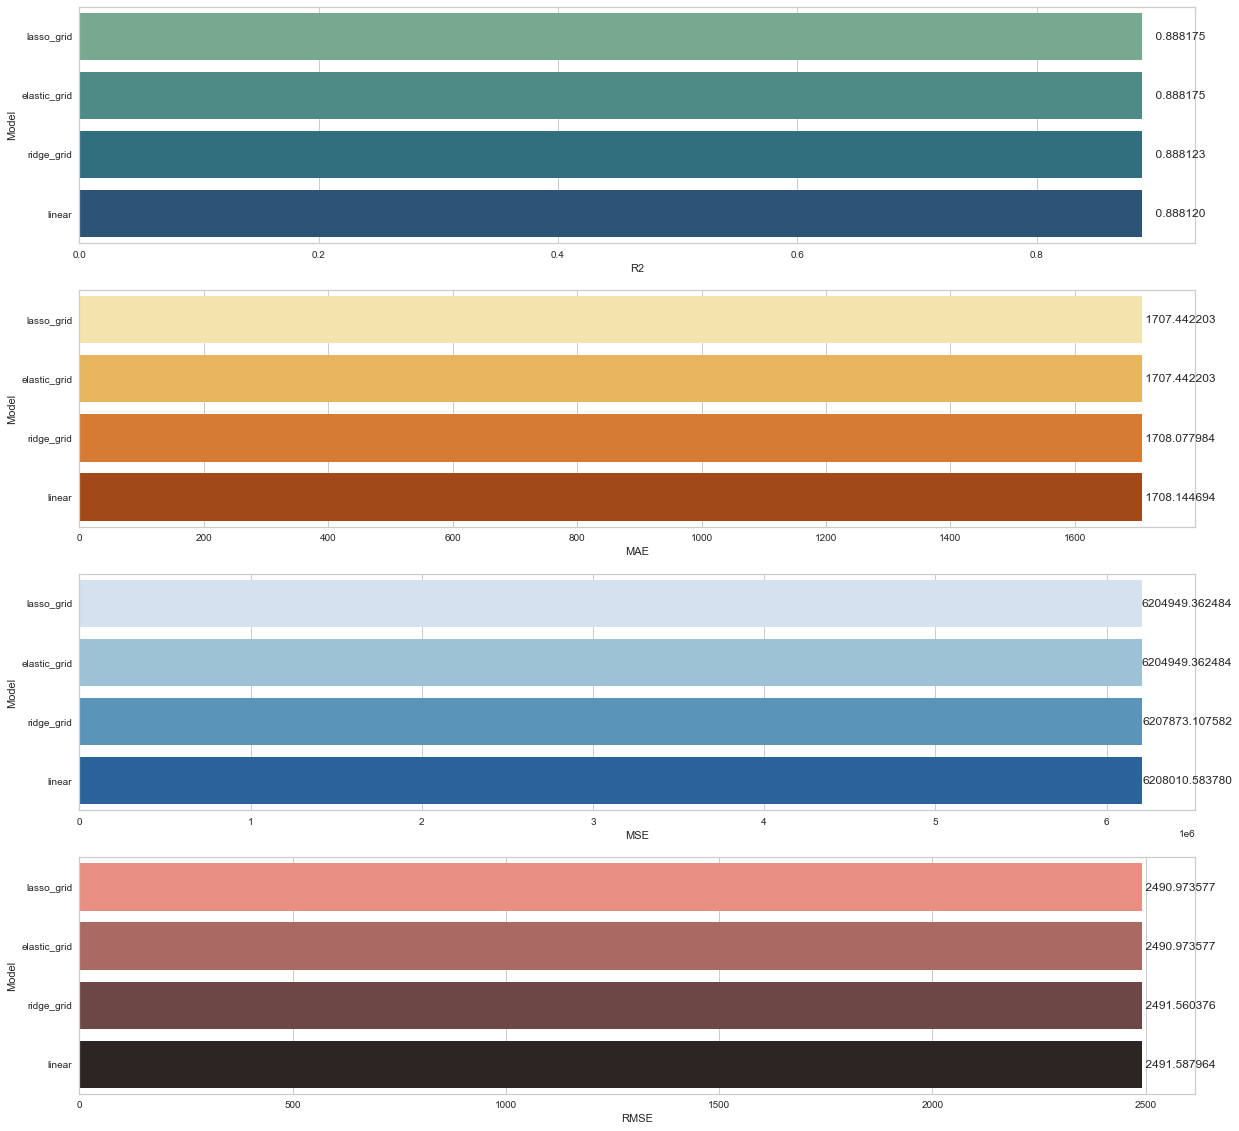

In [512]:
compare = pd.DataFrame({"Model": ["linear", "ridge_grid",  "lasso_grid", "elastic_grid"],
            "R2": [lm_R2, grid_ridge_R2, grid_lasso_R2, grid_elas_R2],
            "MAE": [lm_mae, grid_ridge_mae, grid_lasso_mae, grid_elas_mae],
            "MSE": [lm_mse, grid_ridge_mse, grid_lasso_mse, grid_elas_mse],
            "RMSE": [lm_rmse, grid_ridge_rmse, grid_lasso_rmse, grid_elas_rmse]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:12f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(20,20))
plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="crest")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="YlOrBr")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="MSE", ascending=True)
ax=sns.barplot(x="MSE", y="Model", data=compare, palette="Blues")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="dark:salmon_r")
labels(ax)

plt.show()

In [513]:
compare

,Model,R2,MAE,MSE,RMSE
2,lasso_grid,0.888,1707.442,6204949.362,2490.974
3,elastic_grid,0.888,1707.442,6204949.362,2490.974
1,ridge_grid,0.888,1708.078,6207873.108,2491.560
0,linear,0.888,1708.145,6208010.584,2491.588


In [518]:
final_scaler = StandardScaler()  
X_scaled = final_scaler.fit_transform(X)

In [519]:
final_model = Lasso(alpha=1) 

In [520]:
final_model.fit(X_scaled, y)

Lasso(alpha=1)

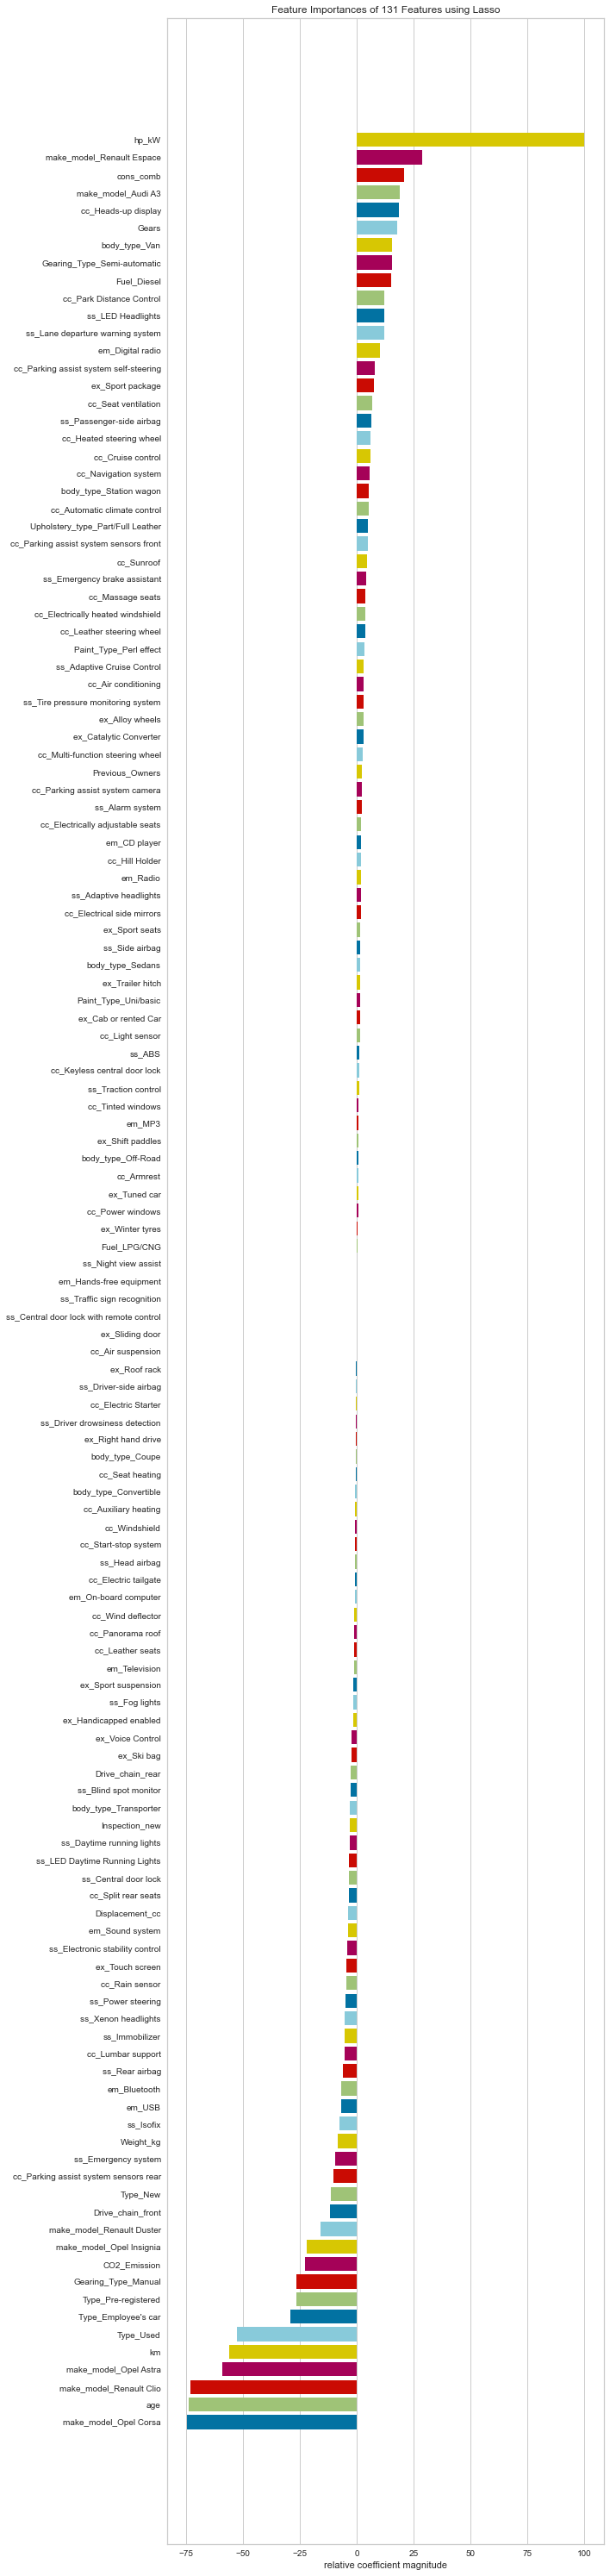

In [521]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [522]:
X_new = pd.DataFrame(X)[['age', 'km', 'hp_kW']]
X_new

,age,km,hp_kW
0,3.000,56013.000,66.000
1,2.000,80000.000,141.000
2,3.000,83450.000,85.000
3,3.000,73000.000,66.000
4,3.000,16200.000,66.000
...,...,...,...
15904,0.000,1647.363,147.000
15905,0.000,9900.000,165.000
15906,0.000,15.000,146.000
15907,0.000,10.000,147.000


In [523]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [524]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

In [525]:
lasso_model2 = Lasso(alpha=1)
lasso_model2.fit(X_train_scaled2, y_train2)

Lasso(alpha=1)

In [526]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [527]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")

,lasso_new_train,lasso_new_test
R2,0.674,0.686
mae,3336.040,3312.764
mse,17674952.472,17423557.307
rmse,4204.159,4174.153


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___